In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:
salary=pd.read_csv("/content/trainfile.csv")
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [3]:
salary.info()#null values more in grosspay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [4]:
salary_cpy=salary.copy()
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [5]:
salary_cpy.columns=salary_cpy.columns.str.strip()
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [6]:
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [7]:
salary_cpy=salary_cpy.dropna(subset=['HireDate'])
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [8]:
salary_cpy=salary_cpy.drop('GrossPay',axis=1)
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [9]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02669      1
W02661      1
W02666      1
W02534      1
W02502      1
Name: AgencyID, Length: 1177, dtype: int64

In [10]:
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
HLTH-Health Dept Locatio       6
Council Services               6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [11]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                   4817
POLICE OFFICER                   1866
LABORER (Hourly)                  597
EMT Firefighter Suppression       358
CROSSING GUARD                    337
                                 ... 
Forestry Technician                 1
LACTATION TECHNICIAN                1
EVENTS MANAGER                      1
PUBLIC INFORMATION OFFICER II       1
DIRECTOR HUMAN RESOURCES            1
Name: JobTitle, Length: 1073, dtype: int64

In [12]:
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
07/25/1983       1
04/24/2000       1
03/28/1983       1
09/07/1984       1
09/14/2010       1
Name: HireDate, Length: 4737, dtype: int64

In [13]:
salary_cpy['AnnualSalary']=salary_cpy['AnnualSalary'].apply(lambda x:(float)(str(x)[1:]))

In [14]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [15]:
salary_cpy['HireDay']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x[3:5])))
salary_cpy['HireMonth']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x[0:2])))
salary_cpy['HireYear']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x[6:])))

In [16]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [17]:
salary_cpy['JobTitle']=  salary_cpy['JobTitle'].apply(lambda x: str(x).strip().replace("  "," ")) 
salary_cpy['AgencyID']=  salary_cpy['AgencyID'].apply(lambda x: str(x).strip().replace("  "," ")) 
salary_cpy['Agency']=  salary_cpy['Agency'].apply(lambda x: str(x).strip().replace("  "," "))                                          


In [18]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [19]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x:str(x).upper())
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x:str(x).upper())
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x:str(x).upper())

In [20]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013


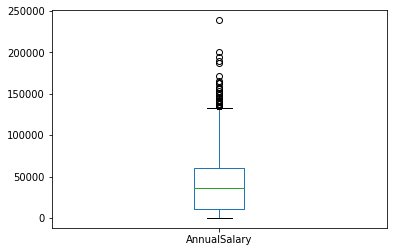

In [21]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [22]:
salary_cpy=salary_cpy[salary_cpy['AnnualSalary']<140000]

In [23]:
salary_cpy.shape

(18885, 9)

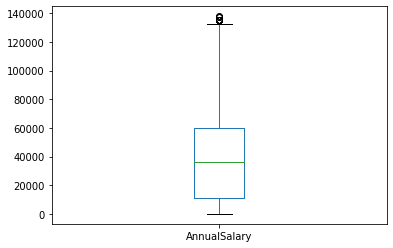

In [24]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

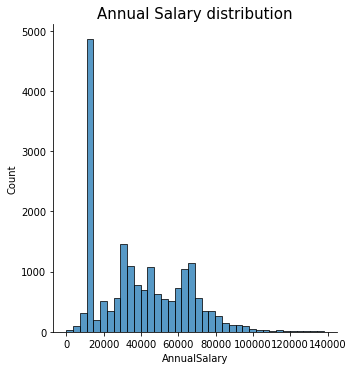

In [25]:
sns.displot(salary_cpy.AnnualSalary)
plt.title("Annual Salary distribution",fontsize=15)
plt.show()

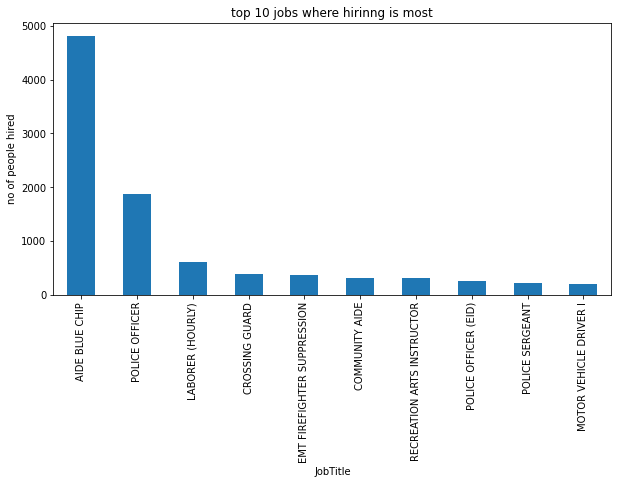

In [26]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(["JobTitle"])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("no of people hired")
plt.title('top 10 jobs where hirinng is most')
plt.show()

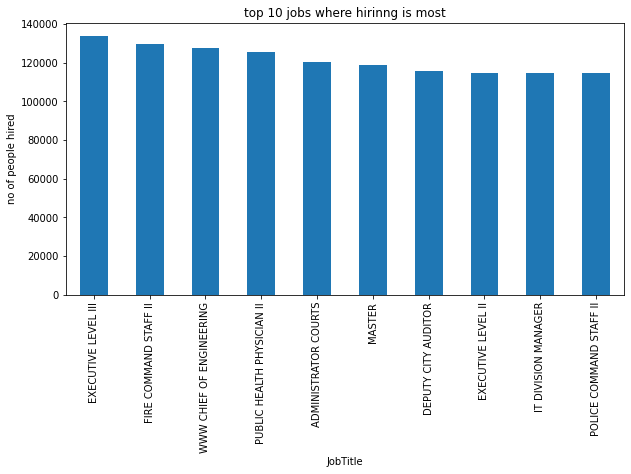

In [27]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(["JobTitle"])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("no of people hired")
plt.title('top 10 jobs where hirinng is most')
plt.show()

In [28]:
mean_sal=salary_cpy.AnnualSalary.mean()
good_paying_jobs=salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

797

In [29]:
good_paying_jobs
  

,JobTitle,AnnualSalary
0,911 LEAD OPERATOR,47886.000000
1,911 OPERATOR,42835.743590
2,911 OPERATOR SUPERVISOR,54797.500000
3,ACCOUNT EXECUTIVE,42960.000000
4,ACCOUNTANT I,46316.642857
...,...,...
1049,ZONING ADMINISTRATOR,82100.000000
1050,ZONING APPEALS ADVISOR BMZA,59274.000000
1051,ZONING ENFORCEMENT OFFICER,62000.000000
1052,ZONING EXAMINER I,43674.000000


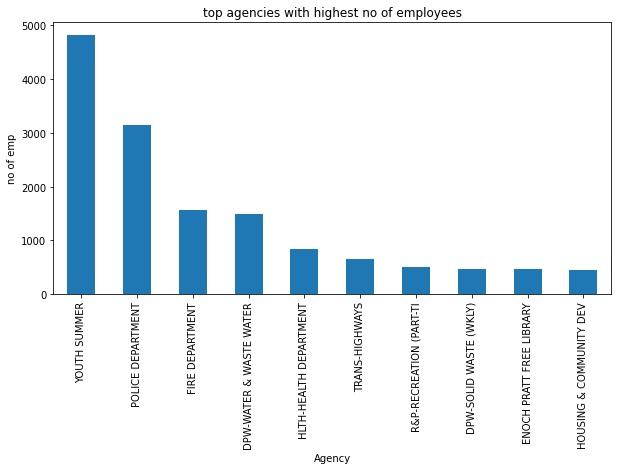

In [30]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("no of emp")
plt.title("top agencies with highest no of employees")
plt.show()

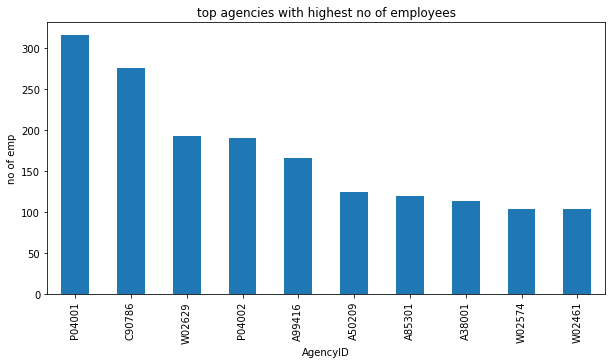

In [31]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("no of emp")
plt.title("top agencies with highest no of employees")
plt.show()

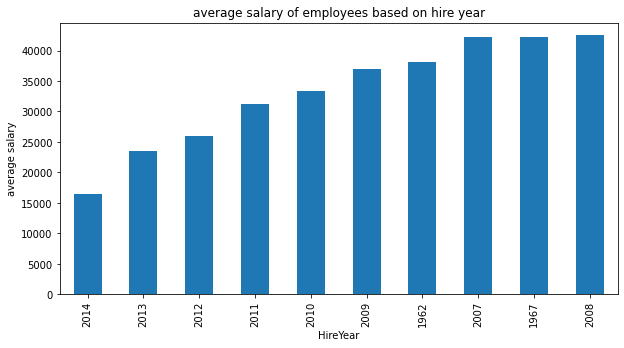

In [32]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('average salary')
plt.title('average salary of employees based on hire year')
plt.show()

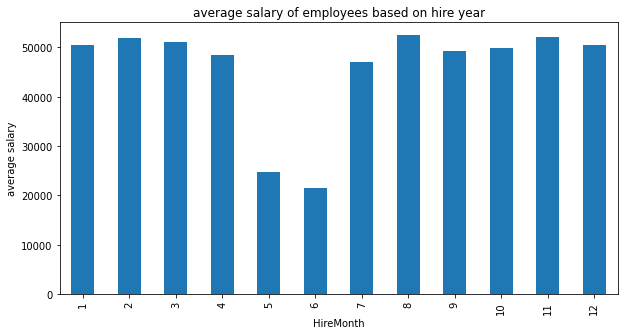

In [33]:
 plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('average salary')
plt.title('average salary of employees based on hire year')
plt.show()

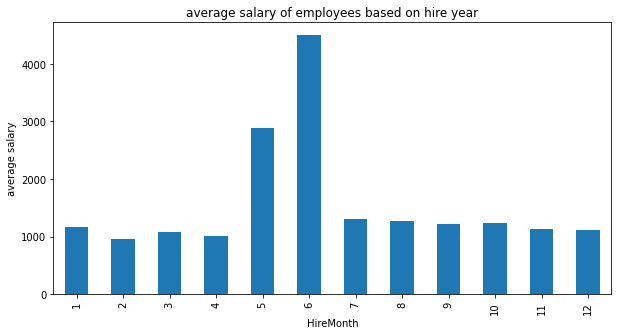

In [34]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('average salary')
plt.title('average salary of employees based on hire year')
plt.show()

In [35]:
salary_master=salary_cpy.copy()

In [36]:
mean_job= salary_master.groupby(['JobTitle'])['AnnualSalary'].mean()
mean_job

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1054, dtype: float64

In [37]:
salary_master['JobTitle']=salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle']

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18885, dtype: float64

In [38]:
mean_job= salary_master.groupby(['Agency'])['AnnualSalary'].mean()
salary_master['Agency']=salary_master['Agency'].map(mean_job)
salary_master['Agency']


0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61481.005417
             ...     
18976    11313.967200
18977    11313.967200
18978    61481.005417
18979    61481.005417
18980    42565.513078
Name: Agency, Length: 18885, dtype: float64

In [39]:

mean_job= salary_master.groupby(['AgencyID'])['AnnualSalary'].mean()
salary_master['AgencyID']=salary_master['AgencyID'].map(mean_job)
salary_master['AgencyID']

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18885, dtype: float64

In [40]:
 salary_master=salary_master.drop(['HireDate','Name'],axis=1)
 salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18885 non-null  float64
 1   AgencyID      18885 non-null  float64
 2   Agency        18885 non-null  float64
 3   AnnualSalary  18885 non-null  float64
 4   HireDay       18885 non-null  int64  
 5   HireMonth     18885 non-null  int64  
 6   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


In [41]:
 salary_train,salary_test=train_test_split(salary_master,train_size=0.7,random_state=10)

In [42]:
print(salary_train.shape)
print(salary_test.shape)

(13219, 7)
(5666, 7)


In [43]:
y_train=salary_train.pop("AnnualSalary")
x_train=salary_train
y_test=salary_test.pop("AnnualSalary")
x_test=salary_test

In [44]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,21570.423841,21474.446429,31494.602740,26,3,2007
7529,11313.967200,11310.000000,11313.967200,16,6,2014
15366,11313.967200,11310.000000,11313.967200,10,6,2013
3237,11313.967200,11310.000000,11313.967200,11,6,2009
16659,11313.967200,11310.000000,11313.967200,19,6,2014
...,...,...,...,...,...,...
9453,11313.967200,11310.000000,11313.967200,21,5,2014
7371,29925.666667,33754.400000,31594.490526,4,3,2002
17822,34098.128205,38263.434783,31494.602740,27,5,1999
7373,42275.081081,62661.900000,62661.900000,6,10,1969


In [45]:
 scaler=StandardScaler()
 x_train[x_train.columns]=scaler.fit_transform(x_train[x_train.columns])
 x_train.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04
mean,1.054960e-16,8.526730e-16,2.849421e-16,1.531228e-16,-8.850541e-17,-7.982991e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.546632e+00,-1.691969e+00,-1.397343e+00,-1.763380e+00,-1.822288e+00,-4.138882e+00
25%,-1.162446e+00,-1.272054e+00,-1.345816e+00,-8.086782e-01,-4.642147e-01,-5.827611e-01
50%,-1.457188e-01,9.319493e-02,1.459947e-01,2.668601e-02,-1.246964e-01,2.822413e-01
75%,8.700324e-01,9.033706e-01,1.048937e+00,7.427125e-01,8.938587e-01,8.589095e-01
max,3.889902e+00,2.886953e+00,1.959063e+00,1.816752e+00,1.912414e+00,9.550209e-01


In [46]:
x_test[x_test.columns]=scaler.transform(x_test[x_test.columns])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [47]:
 lr=LinearRegression()
 salary_reg=lr.fit(x_train,y_train)

In [48]:
salary_reg.score(x_train,y_train)

0.9652498067695455

In [49]:
salary_reg.score(x_test,y_test)

0.9647165830506235

In [50]:
print(salary_reg.coef_)
print(salary_reg.intercept_)

[22107.57351879  2772.01552827 -1638.49731197   -78.87693955
  -103.80442772 -2104.19216623]
39505.76539904681


In [51]:
y_pred=salary_reg.predict(x_test)
y_pred

array([58719.19937463, 10475.32610913, 10576.42843556, ...,
       57516.60452052, 65294.01185641, 11178.57496343])

In [52]:
y_test

9797     59409.0
4541     11310.0
2860     11310.0
8139     66231.0
2876     40303.0
          ...   
11213    40954.0
3366     69900.0
11606    57900.0
14382    65480.0
394      11310.0
Name: AnnualSalary, Length: 5666, dtype: float64